In [1]:
import pandas as pd

# Load the dataset
file_path = 'Song.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataframe
data.head()

,Artist,Title,Year,Sales,Streams,Downloads,Radio Plays,Rating
0,Bill Haley & his Comets,Rock Around the Clock,1955,36.503,19.961,7.458,5.663,0.760
1,Celine Dion,My Heart Will Go On,1998,35.405,12.636,8.944,23.701,3.610
2,Sinead O'Connor,Nothing Compares 2 U,1990,35.135,14.582,10.242,23.747,2.733
3,The Beatles,Hey Jude,1968,34.442,25.545,16.390,16.541,1.510
4,Bryan Adams,(Everything I Do) I Do it For You,1991,34.367,16.523,12.368,23.194,3.121


In [2]:
data.describe()

,Year,Sales,Streams,Downloads,Radio Plays,Rating
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,1979.861443,8.154870,4.628823,2.970114,3.985120,0.481876
std,19.759676,4.555715,3.273776,2.668744,4.354419,0.624719
min,1901.000000,4.149000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,5.069250,2.351250,1.039500,0.600000,0.000000
50%,1981.000000,6.438000,4.200000,2.200000,2.570000,0.512000
75%,1996.000000,9.784000,6.307000,4.183750,5.884000,0.571000
max,2014.000000,36.503000,25.545000,19.780000,24.393000,4.460000


In [3]:
top_sales_song = data.loc[data['Sales'].idxmax()]
top_sales_song

Artist         Bill Haley & his Comets
Title            Rock Around the Clock
Year                              1955
Sales                           36.503
Streams                         19.961
Downloads                        7.458
Radio Plays                      5.663
Rating                            0.76
Name: 0, dtype: object

In [11]:
import matplotlib
import matplotlib.pyplot as plt
# matplotlib 폰트설정
# plt.rc('font', family='NanumGothicOTF') # For MacOS
plt.rc('font', family='NanumGothic') # For Windows, Ubuntu
plt.rcParams['axes.unicode_minus']=False  #음수일때 -가 깨져보이는 현상 방지
%matplotlib inline
#경고출력 무시하도록 설정
import warnings
warnings.filterwarnings(action='ignore')

<Axes: title={'center': '연도별 평균 판매량'}, xlabel='Year'>

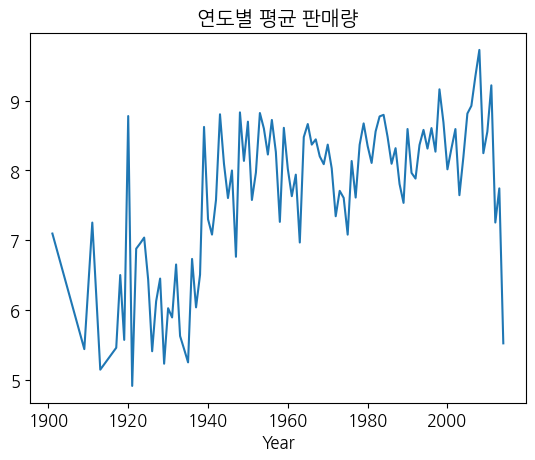

In [12]:
yearly_sales = data.groupby('Year')['Sales'].mean()
yearly_sales.plot(kind='line', title='연도별 평균 판매량')

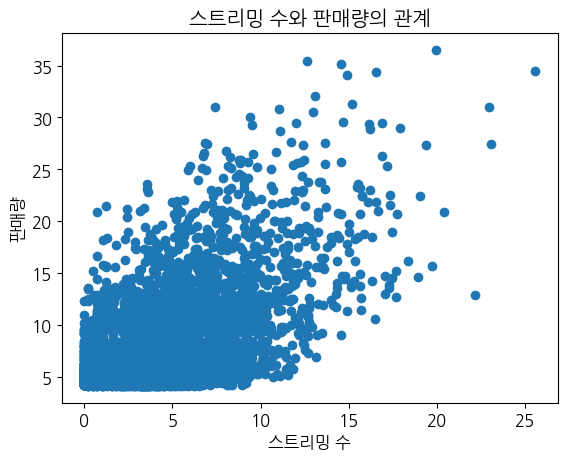

In [13]:
import matplotlib.pyplot as plt

plt.scatter(data['Streams'], data['Sales'])
plt.xlabel('스트리밍 수')
plt.ylabel('판매량')
plt.title('스트리밍 수와 판매량의 관계')
plt.show()

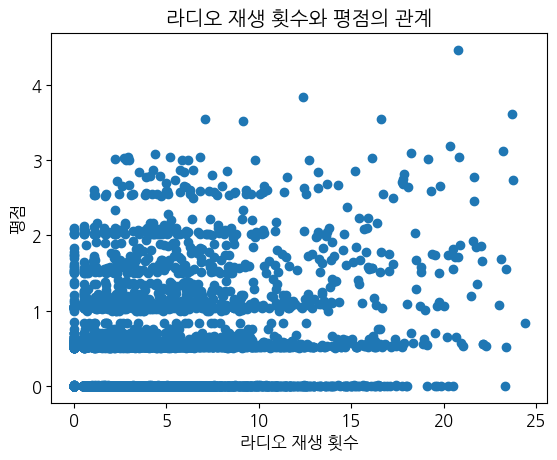

In [14]:
plt.scatter(data['Radio Plays'], data['Rating'])
plt.xlabel('라디오 재생 횟수')
plt.ylabel('평점')
plt.title('라디오 재생 횟수와 평점의 관계')
plt.show()

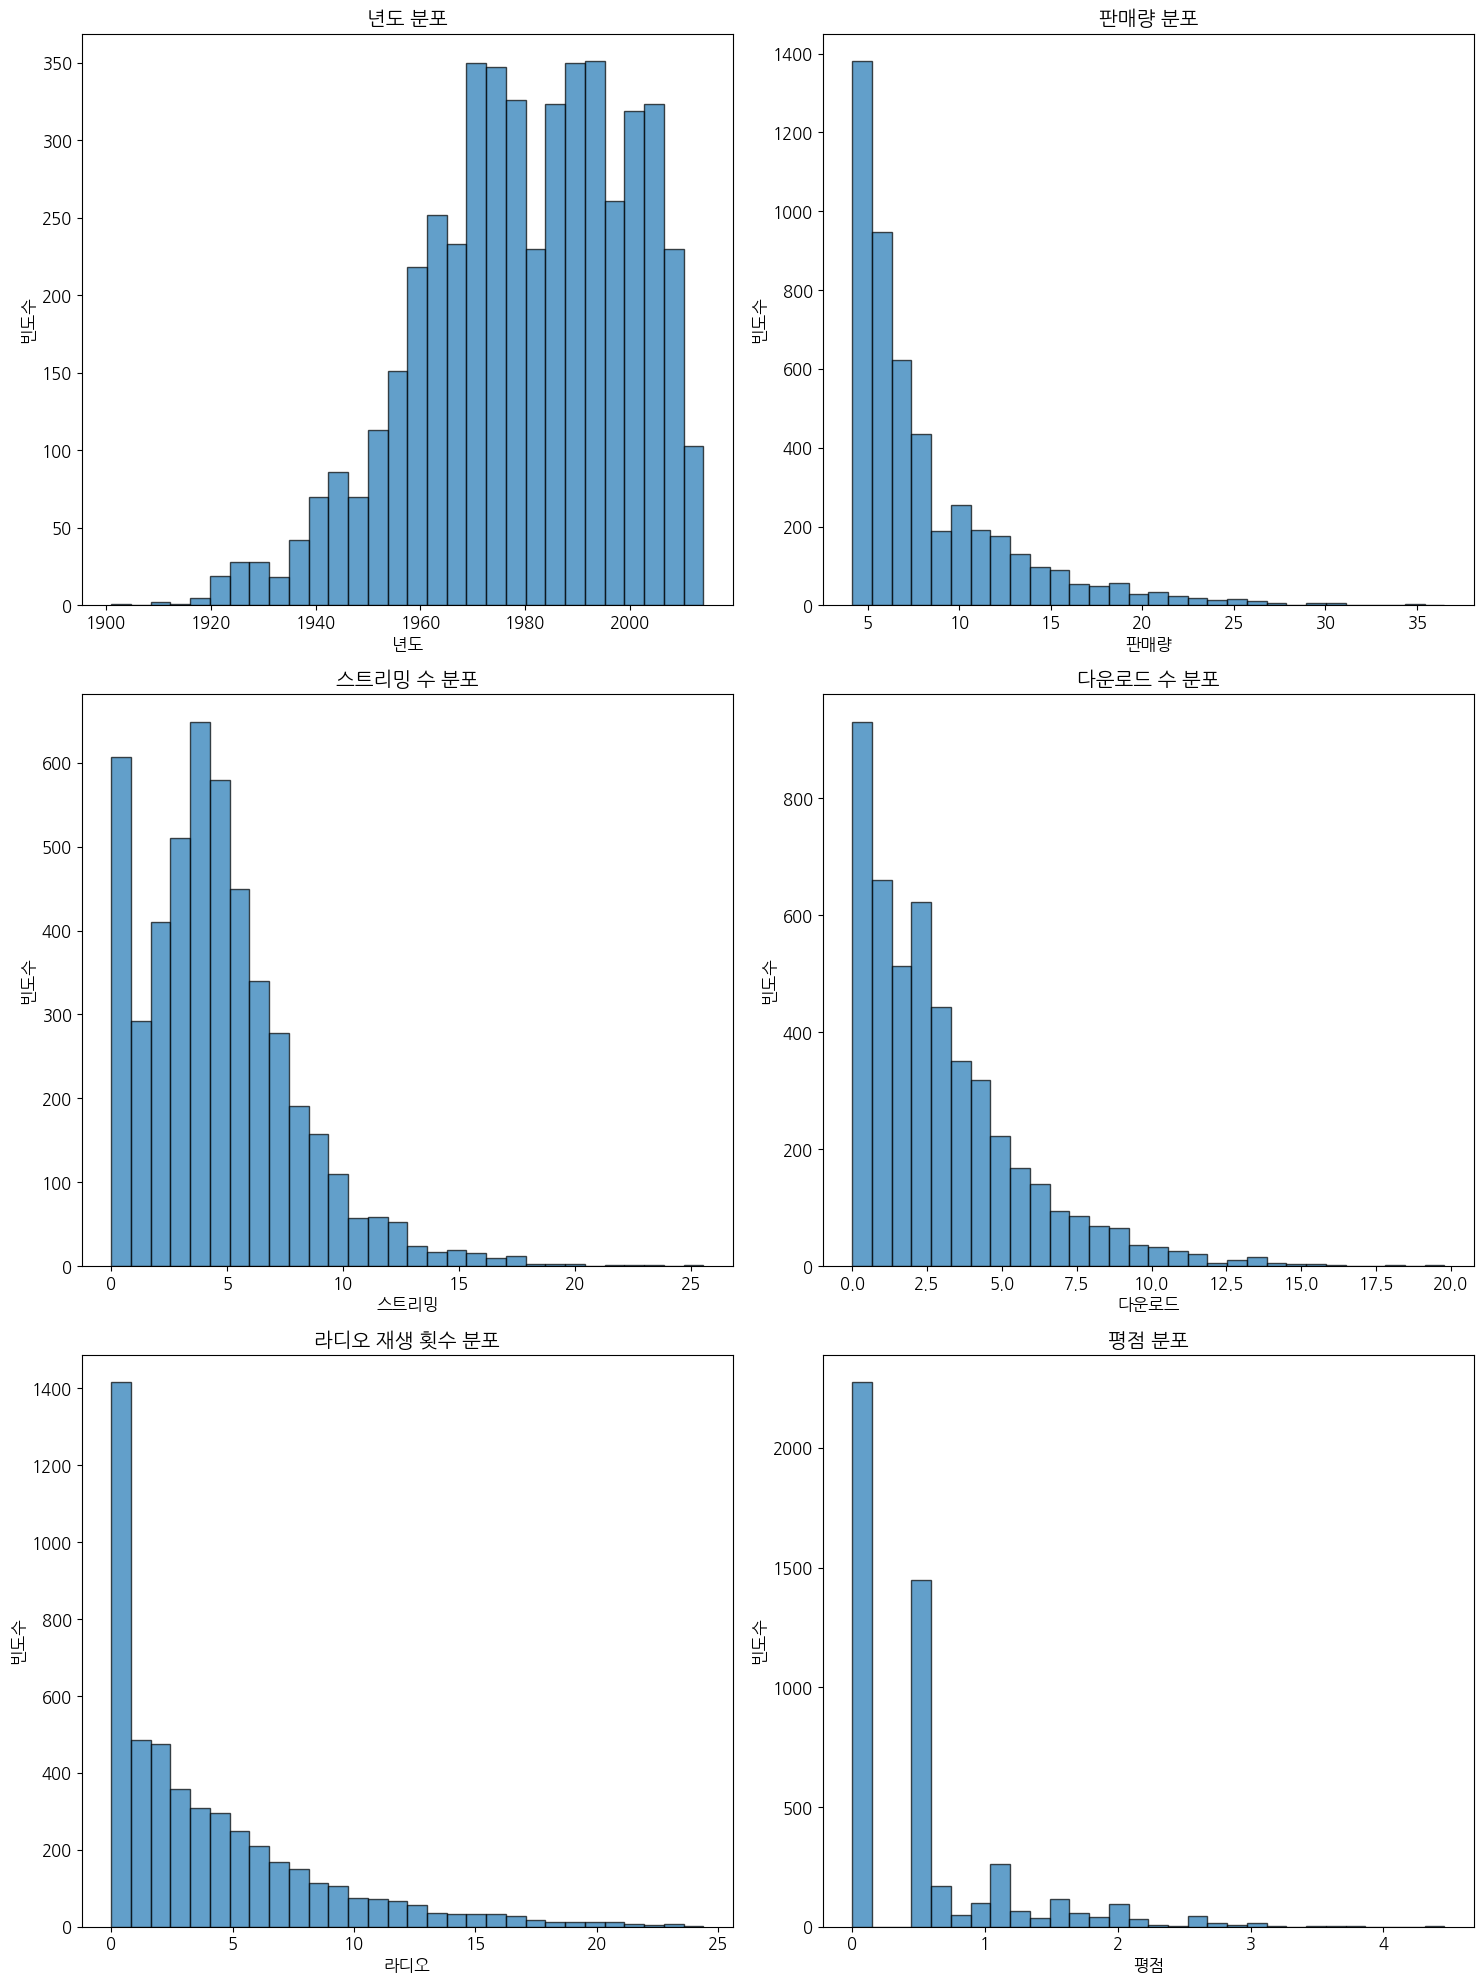

In [16]:
import matplotlib.pyplot as plt

# 각 열의 분포 시각화
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))

columns = ['Year', 'Sales', 'Streams', 'Downloads', 'Radio Plays', 'Rating']
titles = ['년도 분포', '판매량 분포', '스트리밍 수 분포', '다운로드 수 분포', '라디오 재생 횟수 분포', '평점 분포']

for i, col in enumerate(columns):
    row, col_num = divmod(i, 2)
    axes[row, col_num].hist(data[col], bins=30, edgecolor='k', alpha=0.7)
    axes[row, col_num].set_title(titles[i])
    axes[row, col_num].set_xlabel(titles[i].split()[0])
    axes[row, col_num].set_ylabel('빈도수')

plt.tight_layout()
plt.show()


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4850 entries, 0 to 4849
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Artist       4850 non-null   object 
 1   Title        4850 non-null   object 
 2   Year         4850 non-null   int64  
 3   Sales        4850 non-null   float64
 4   Streams      4850 non-null   float64
 5   Downloads    4850 non-null   float64
 6   Radio Plays  4850 non-null   float64
 7   Rating       4850 non-null   float64
dtypes: float64(5), int64(1), object(2)
memory usage: 303.2+ KB


In [21]:
# 중복된 데이터 확인 및 제거
duplicates = data.duplicated()
num_duplicates = duplicates.sum()
data_cleaned = data.drop_duplicates()

# 이상치 확인 (기본적인 통계량을 통해 확인)
summary_stats = data_cleaned.describe()

# 데이터 정리 요약
data_summary = {
    'Initial Number of Records': len(data),
    'Number of Duplicates': num_duplicates,
    'Number of Records after Cleaning': len(data_cleaned),
    'Summary Statistics': summary_stats
}

In [19]:
import ace_tools as tools; tools.display_dataframe_to_user(name="Data Summary", dataframe=pd.DataFrame(data_summary))

data_cleaned.describe()

ModuleNotFoundError: No module named 'ace_tools'

In [23]:
# dataframe=pd.DataFrame(data_summary)
# dataframe
data_summary

{'Initial Number of Records': 4850,
 'Number of Duplicates': 0,
 'Number of Records after Cleaning': 4850,
 'Summary Statistics':               Year        Sales      Streams    Downloads  Radio Plays  \
 count  4850.000000  4850.000000  4850.000000  4850.000000  4850.000000   
 mean   1979.861443     8.154870     4.628823     2.970114     3.985120   
 std      19.759676     4.555715     3.273776     2.668744     4.354419   
 min    1901.000000     4.149000     0.000000     0.000000     0.000000   
 25%    1967.000000     5.069250     2.351250     1.039500     0.600000   
 50%    1981.000000     6.438000     4.200000     2.200000     2.570000   
 75%    1996.000000     9.784000     6.307000     4.183750     5.884000   
 max    2014.000000    36.503000    25.545000    19.780000    24.393000   
 
             Rating  
 count  4850.000000  
 mean      0.481876  
 std       0.624719  
 min       0.000000  
 25%       0.000000  
 50%       0.512000  
 75%       0.571000  
 max       4.46000

In [24]:
dataframe=pd.DataFrame(data_summary['Summary Statistics'])
dataframe

,Year,Sales,Streams,Downloads,Radio Plays,Rating
count,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000,4850.000000
mean,1979.861443,8.154870,4.628823,2.970114,3.985120,0.481876
std,19.759676,4.555715,3.273776,2.668744,4.354419,0.624719
min,1901.000000,4.149000,0.000000,0.000000,0.000000,0.000000
25%,1967.000000,5.069250,2.351250,1.039500,0.600000,0.000000
50%,1981.000000,6.438000,4.200000,2.200000,2.570000,0.512000
75%,1996.000000,9.784000,6.307000,4.183750,5.884000,0.571000
max,2014.000000,36.503000,25.545000,19.780000,24.393000,4.460000


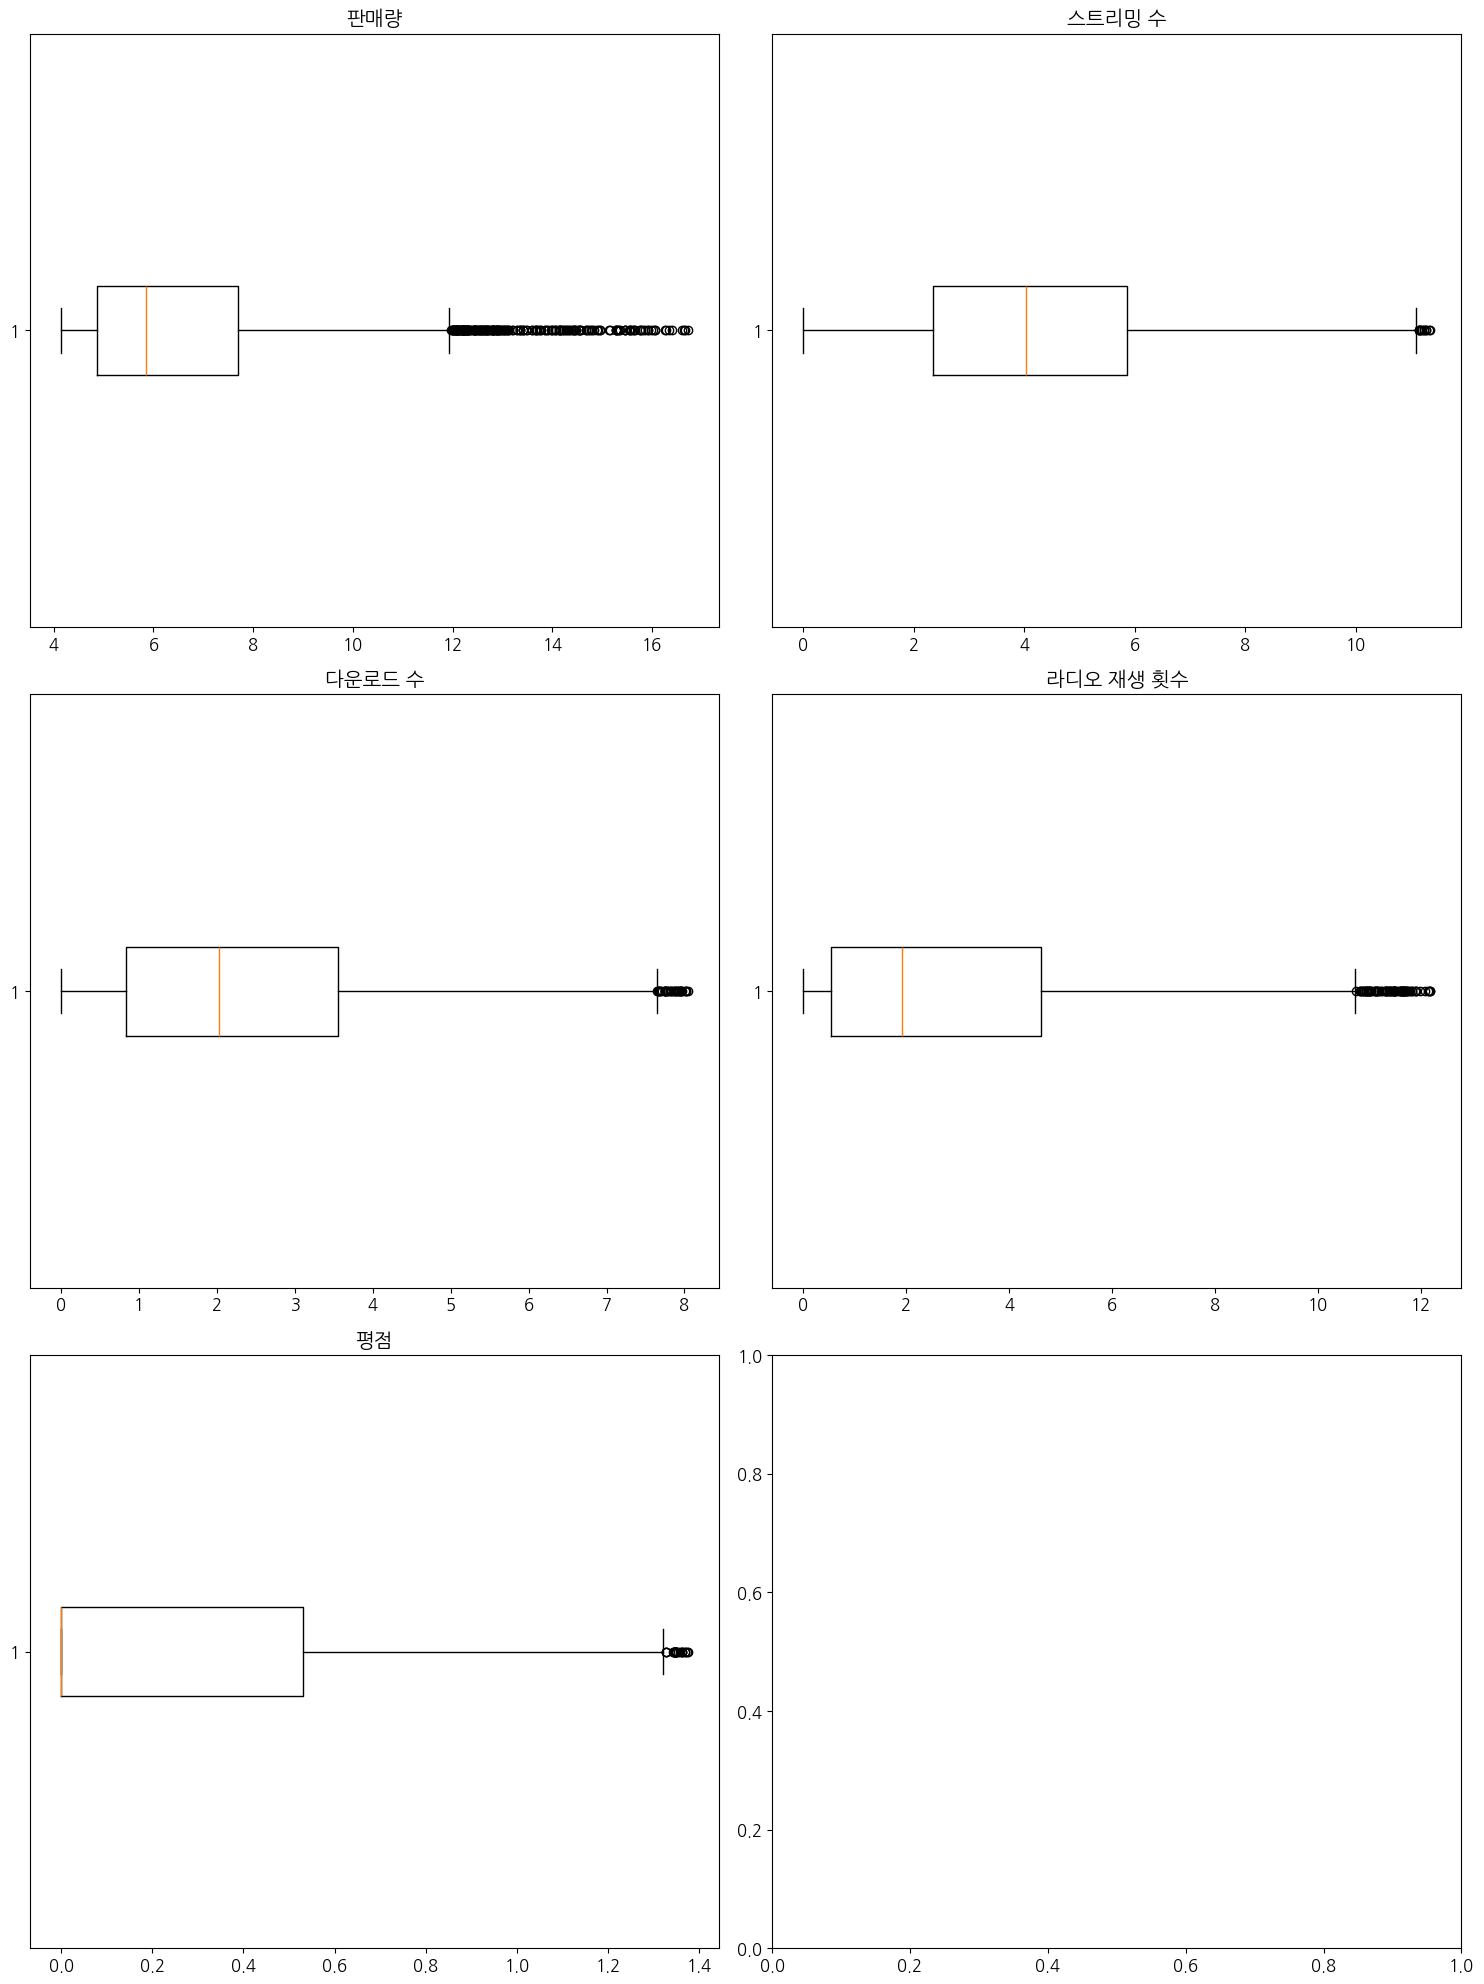

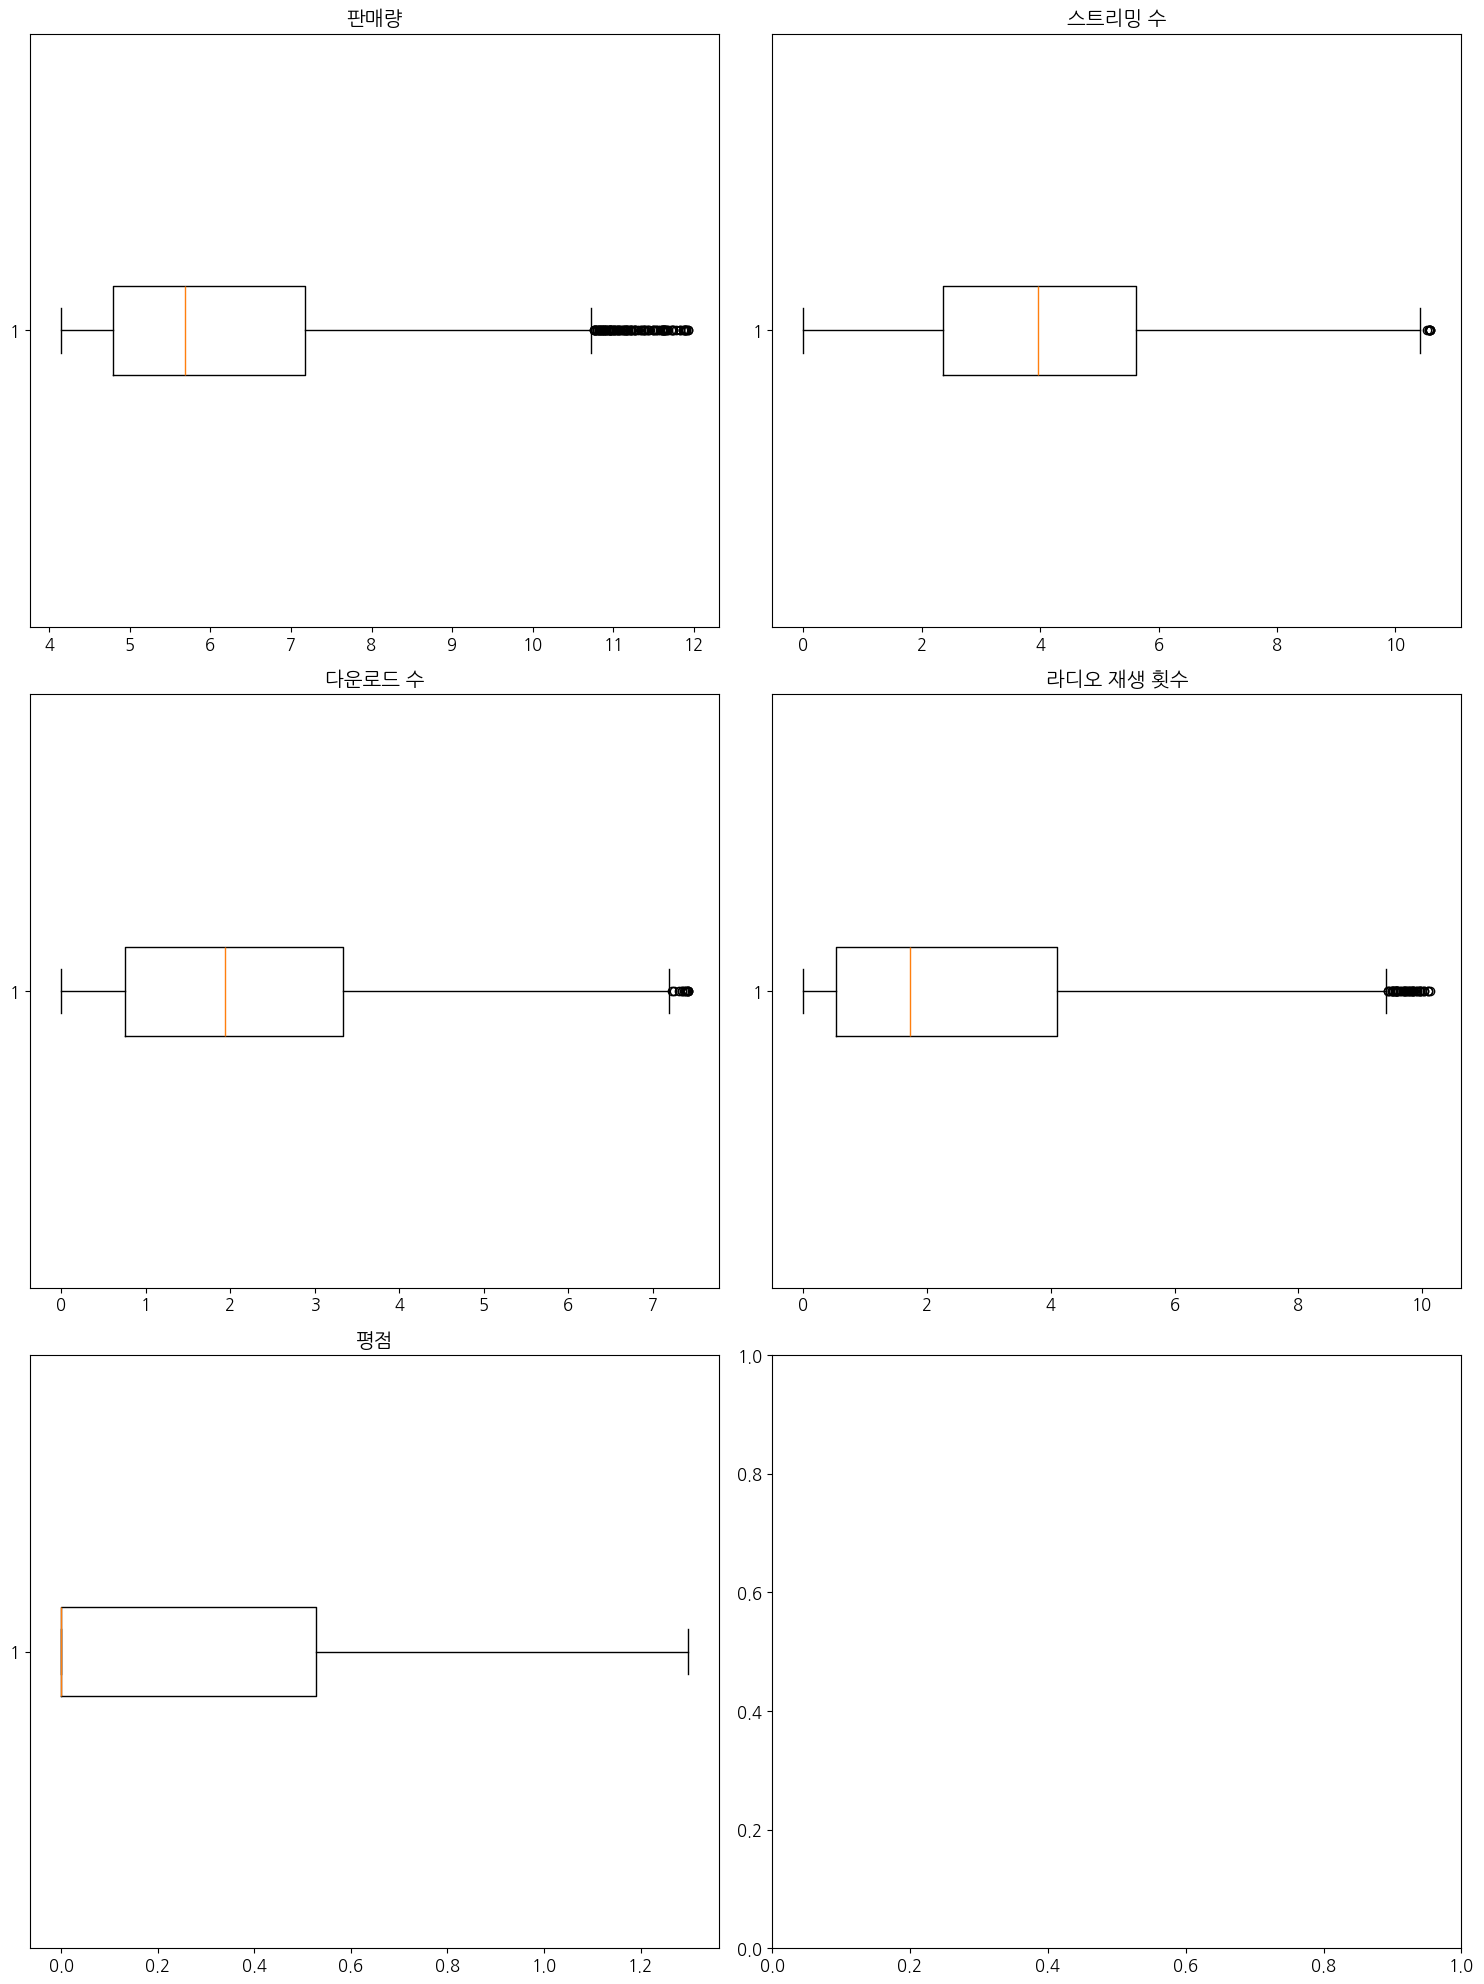

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# 이상치 식별을 위한 Box Plot 그리기
def plot_boxplots(data):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 20))
    columns = ['Sales', 'Streams', 'Downloads', 'Radio Plays', 'Rating']
    titles = ['판매량', '스트리밍 수', '다운로드 수', '라디오 재생 횟수', '평점']

    for i, col in enumerate(columns):
        row, col_num = divmod(i, 2)
        axes[row, col_num].boxplot(data[col], vert=False)
        axes[row, col_num].set_title(titles[i])

    plt.tight_layout()
    plt.show()

# 이상치 제거 함수
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return filtered_df

# 이상치 식별을 위한 Box Plot 그리기
plot_boxplots(data_cleaned)

# 각 열에 대해 이상치 제거
columns_with_outliers = ['Sales', 'Streams', 'Downloads', 'Radio Plays', 'Rating']
for column in columns_with_outliers:
    data_cleaned = remove_outliers(data_cleaned, column)

# 이상치 제거 후 Box Plot 그리기
plot_boxplots(data_cleaned)

In [27]:
# CSV 파일로 저장
data_cleaned.to_csv('Cleaned_Song_Data.csv', index=False)

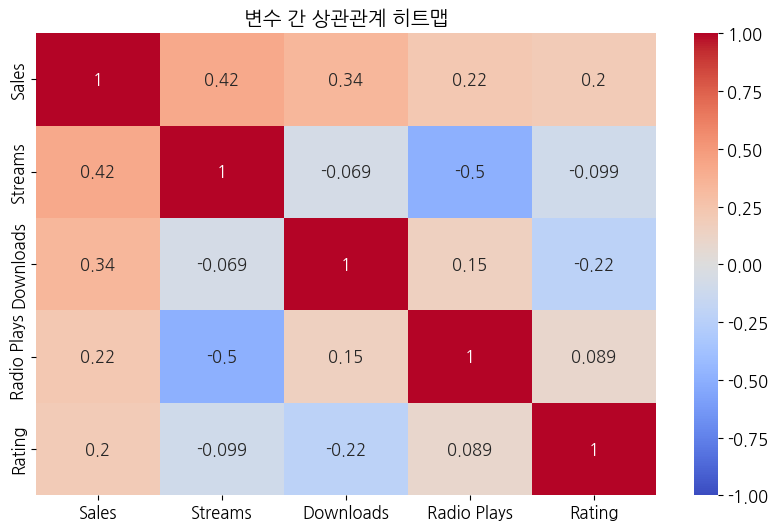

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 상관관계 시각화
plt.figure(figsize=(10, 6))
correlation_matrix = data_cleaned[['Sales', 'Streams', 'Downloads', 'Radio Plays', 'Rating']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('변수 간 상관관계 히트맵')
plt.show()

In [29]:
import pandas as pd

# 평점의 사분위수 계산
rating_quantiles = data_cleaned['Rating'].quantile([0.25, 0.75])
low_rating_threshold = rating_quantiles[0.25]
high_rating_threshold = rating_quantiles[0.75]

# 높은 평점을 받은 노래와 낮은 평점을 받은 노래 구분
high_rating_songs = data_cleaned[data_cleaned['Rating'] >= high_rating_threshold]
low_rating_songs = data_cleaned[data_cleaned['Rating'] <= low_rating_threshold]

# 각 그룹의 평균값 계산
high_rating_means = high_rating_songs[['Sales', 'Streams', 'Downloads', 'Radio Plays']].mean()
low_rating_means = low_rating_songs[['Sales', 'Streams', 'Downloads', 'Radio Plays']].mean()

# 결과를 데이터프레임으로 정리
rating_comparison = pd.DataFrame({
    'High Rating Songs': high_rating_means,
    'Low Rating Songs': low_rating_means
})

rating_comparison


,High Rating Songs,Low Rating Songs
Sales,6.758179,5.875205
Streams,3.734070,4.202821
Downloads,1.718238,2.546374
Radio Plays,2.935649,2.407010
